In [36]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [37]:
eday = pd.read_excel('Excel/Active EDAY SKU Info[11].xlsx')
sympathy = pd.read_excel('Excel/Active Sympathy SKU Info[44].xlsx')

In [38]:
# Calculate profit in dollar terms for each SKU
sympathy['Profit ($)'] = sympathy['SRP'] * sympathy['Margin']
eday['Profit ($)'] = eday['SRP'] * eday['Margin']

# Display the first few rows of each dataset with the profit in dollar terms
sympathy_profit = sympathy[['SKU', 'SRP', 'Margin', 'Profit ($)']].head()
eday_profit = eday[['SKU', 'SRP', 'Margin', 'Profit ($)']].head()

sympathy_profit, eday_profit


(         SKU  SRP  Margin  Profit ($)
 0   S6-4447s  173    0.34       58.82
 1   S6-4447d  203    0.36       73.08
 2   S6-4447p  233    0.37       86.21
 3  S6-4447Fs  173    0.34       58.82
 4  S6-4447Fd  203    0.36       73.08,
       SKU  SRP  Margin  Profit ($)
 0  C5374s   50    0.05        2.50
 1  C5374d   65    0.11        7.15
 2  C5374p   75    0.14       10.50
 3  C5379s   55    0.09        4.95
 4  C5379d   65    0.13        8.45)

In [39]:
# Define SRP ranges
bins = [0, 60, 75, 90, 120, 150, 180, 210, 240, float('inf')]
labels = ["$0-60", "$61-75", "$76-90", "$91-120", "$121-150", "$151-180", "$181-210", "$211-240", "$241+"]
sympathy['SRP Range'] = pd.cut(sympathy['SRP'], bins=bins, labels=labels, right=False)
eday['SRP Range'] = pd.cut(eday['SRP'], bins=bins, labels=labels, right=False)

# Calculate average profit for each SRP range
sympathy_avg_profit_by_srp = sympathy.groupby('SRP Range')['Profit ($)'].mean().reset_index()
eday_avg_profit_by_srp = eday.groupby('SRP Range')['Profit ($)'].mean().reset_index()

sympathy_avg_profit_by_srp, eday_avg_profit_by_srp


(  SRP Range  Profit ($)
 0     $0-60         NaN
 1    $61-75   10.800000
 2    $76-90   14.503636
 3   $91-120   22.512273
 4  $121-150   37.578095
 5  $151-180   53.642857
 6  $181-210   62.585833
 7  $211-240   80.752000
 8     $241+   86.825000,
   SRP Range  Profit ($)
 0     $0-60    6.564667
 1    $61-75    9.773462
 2    $76-90   14.247500
 3   $91-120   24.752500
 4  $121-150   37.878000
 5  $151-180   51.750000
 6  $181-210   71.666667
 7  $211-240         NaN
 8     $241+         NaN)

In [40]:
# Group by 'Type' and 'SRP Range' and calculate average profit for each combination for Sympathy data
sympathy_avg_profit_by_type_srp = sympathy.groupby(['Type', 'SRP Range'])['Profit ($)'].mean().reset_index()

# Group by 'Type' and 'SRP Range' and calculate average profit for each combination for EDAY data
eday_avg_profit_by_type_srp = eday.groupby(['Type', 'SRP Range'])['Profit ($)'].mean().reset_index()

sympathy_avg_profit_by_type_srp, eday_avg_profit_by_type_srp


(                   Type SRP Range  Profit ($)
 0                Basket     $0-60         NaN
 1                Basket    $61-75   10.800000
 2                Basket    $76-90   14.275000
 3                Basket   $91-120   23.030000
 4                Basket  $121-150   41.817778
 ..                  ...       ...         ...
 121  Vase - bundle only  $121-150   33.390000
 122  Vase - bundle only  $151-180   49.500000
 123  Vase - bundle only  $181-210         NaN
 124  Vase - bundle only  $211-240         NaN
 125  Vase - bundle only     $241+         NaN
 
 [126 rows x 3 columns],
                  Type SRP Range  Profit ($)
 0    Birthday Brights     $0-60         NaN
 1    Birthday Brights    $61-75        7.15
 2    Birthday Brights    $76-90       13.60
 3    Birthday Brights   $91-120       19.95
 4    Birthday Brights  $121-150         NaN
 ..                ...       ...         ...
 103        Wooden Box  $121-150         NaN
 104        Wooden Box  $151-180         NaN
 105

In [41]:
# Group by 'Size' and 'SRP Range' and calculate average profit for each combination for Sympathy data
sympathy_avg_profit_by_size_srp = sympathy.groupby(['Size', 'SRP Range'])['Profit ($)'].mean().reset_index()

# Group by 'Size' and 'SRP Range' and calculate average profit for each combination for EDAY data
eday_avg_profit_by_size_srp = eday.groupby(['Size', 'SRP Range'])['Profit ($)'].mean().reset_index()

sympathy_avg_profit_by_size_srp, eday_avg_profit_by_size_srp


(         Size SRP Range  Profit ($)
 0      Deluxe     $0-60         NaN
 1      Deluxe    $61-75         NaN
 2      Deluxe    $76-90   18.350000
 3      Deluxe   $91-120   20.072222
 4      Deluxe  $121-150   37.826667
 5      Deluxe  $151-180   49.500000
 6      Deluxe  $181-210   66.496000
 7      Deluxe  $211-240   80.790000
 8      Deluxe     $241+         NaN
 9   Exquisite     $0-60         NaN
 10  Exquisite    $61-75         NaN
 11  Exquisite    $76-90         NaN
 12  Exquisite   $91-120         NaN
 13  Exquisite  $121-150   39.533333
 14  Exquisite  $151-180   52.750000
 15  Exquisite  $181-210         NaN
 16  Exquisite  $211-240         NaN
 17  Exquisite     $241+         NaN
 18    Premium     $0-60         NaN
 19    Premium    $61-75         NaN
 20    Premium    $76-90         NaN
 21    Premium   $91-120   23.608571
 22    Premium  $121-150   37.990000
 23    Premium  $151-180   54.560000
 24    Premium  $181-210         NaN
 25    Premium  $211-240   86.210000
 

In [42]:
# Group by 'Size', 'Type' and 'SRP Range' and calculate average profit for each combination for Sympathy data
sympathy_avg_profit_by_size_type_srp = sympathy.groupby(['Size', 'Type', 'SRP Range'])['Profit ($)'].mean().reset_index()

# Group by 'Size', 'Type' and 'SRP Range' and calculate average profit for each combination for EDAY data
eday_avg_profit_by_size_type_srp = eday.groupby(['Size', 'Type', 'SRP Range'])['Profit ($)'].mean().reset_index()

sympathy_avg_profit_by_size_type_srp.head(), eday_avg_profit_by_size_type_srp.head()


(     Size    Type SRP Range  Profit ($)
 0  Deluxe  Basket     $0-60         NaN
 1  Deluxe  Basket    $61-75         NaN
 2  Deluxe  Basket    $76-90   18.000000
 3  Deluxe  Basket   $91-120   18.333333
 4  Deluxe  Basket  $121-150   39.940000,
      Size              Type SRP Range  Profit ($)
 0  Deluxe  Birthday Brights     $0-60         NaN
 1  Deluxe  Birthday Brights    $61-75        7.15
 2  Deluxe  Birthday Brights    $76-90         NaN
 3  Deluxe  Birthday Brights   $91-120         NaN
 4  Deluxe  Birthday Brights  $121-150         NaN)

In [43]:
# Assuming PED value and price adjustment percentage
PED = -1.5
price_adjustment_percentage = 0.05

# Adjusting the SRP by 5%
sympathy['Adjusted SRP'] = sympathy['SRP'] * (1 + price_adjustment_percentage)

# Compute the new sales volume using elasticity. Assuming original sales volume is 100 for simplicity.
original_sales_volume = 100
percentage_change_in_sales = price_adjustment_percentage * PED
new_sales_volume = original_sales_volume * (1 + percentage_change_in_sales)

# Calculate the new profit based on the adjusted SRP
sympathy['New Profit ($)'] = new_sales_volume * (sympathy['Adjusted SRP'] - sympathy['Total Cost of Goods'])

# Calculate the change in profit
sympathy['Profit Change ($)'] = sympathy['New Profit ($)'] - sympathy['Profit ($)'] * original_sales_volume

# Display the first few rows of the dataset with the adjusted SRP, new profit, and profit change
sympathy_profit_comparison = sympathy[['SKU', 'SRP', 'Adjusted SRP', 'Profit ($)', 'New Profit ($)', 'Profit Change ($)']].head()
sympathy_profit_comparison


,SKU,SRP,Adjusted SRP,Profit ($),New Profit ($),Profit Change ($)
0,S6-4447s,173,181.65,58.82,12751.125,6869.125
1,S6-4447d,203,213.15,73.08,15030.325,7722.325
2,S6-4447p,233,244.65,86.21,17300.275,8679.275
3,S6-4447Fs,173,181.65,58.82,12751.125,6869.125
4,S6-4447Fd,203,213.15,73.08,15030.325,7722.325


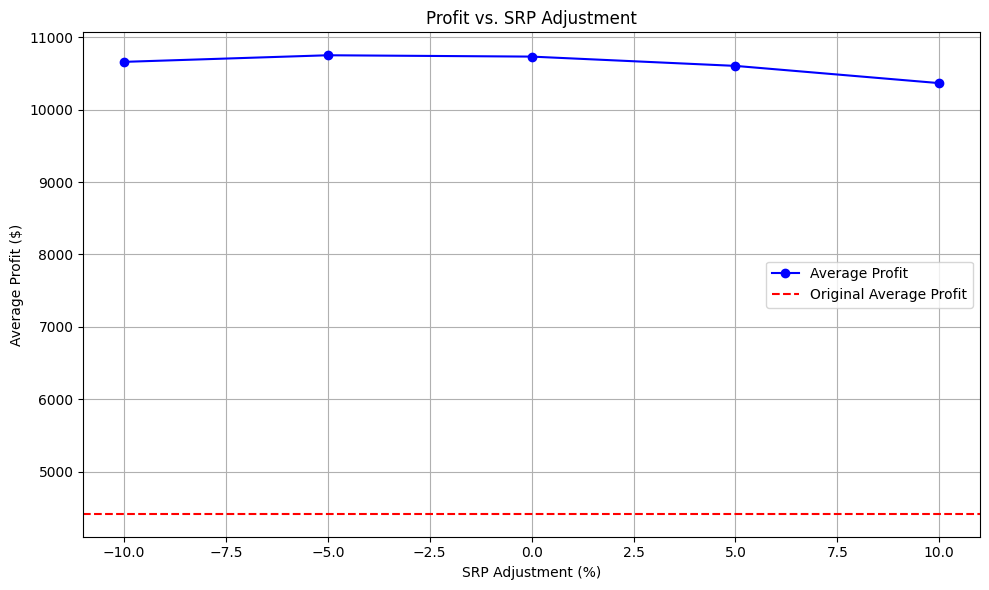

In [44]:
# SRP adjustment values
adjustments = np.array([-0.10, -0.05, 0, 0.05, 0.10])

# Calculate adjusted SRP and resulting profit for each adjustment
adjusted_srps = np.outer(sympathy['SRP'], (1 + adjustments))
change_in_sales_volumes = original_sales_volume * (1 + adjustments * PED)
new_profits = change_in_sales_volumes * (adjusted_srps - np.outer(sympathy['Total Cost of Goods'], np.ones_like(adjustments)))

# Calculate average new profit across all SKUs for each adjustment
avg_new_profits = np.mean(new_profits, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(adjustments * 100, avg_new_profits, marker='o', color='b', label='Average Profit')
plt.axhline(y=np.mean(sympathy['Profit ($)'] * original_sales_volume), color='r', linestyle='--', label='Original Average Profit')
plt.title('Profit vs. SRP Adjustment')
plt.xlabel('SRP Adjustment (%)')
plt.ylabel('Average Profit ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


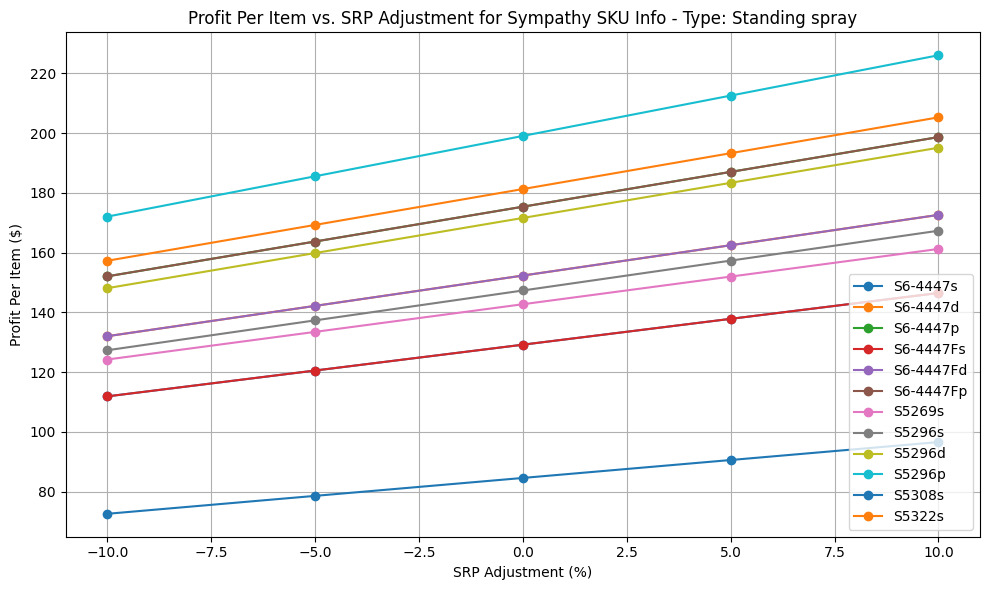

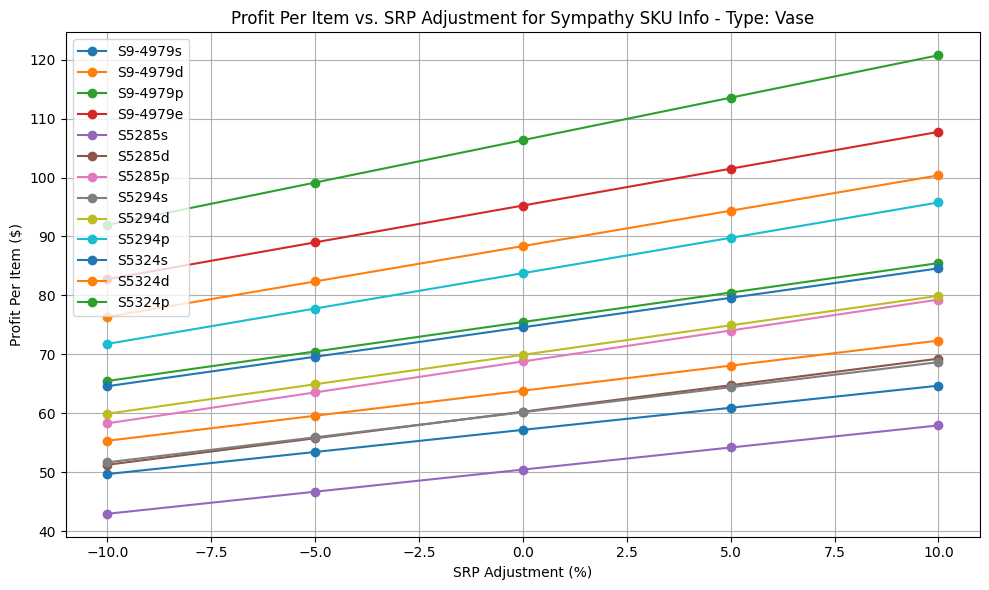

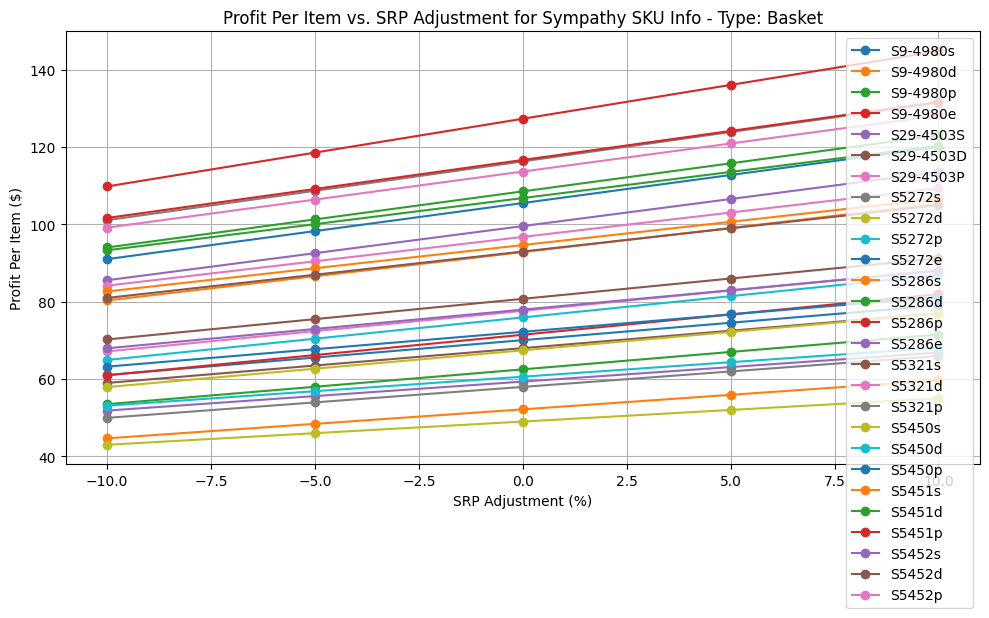

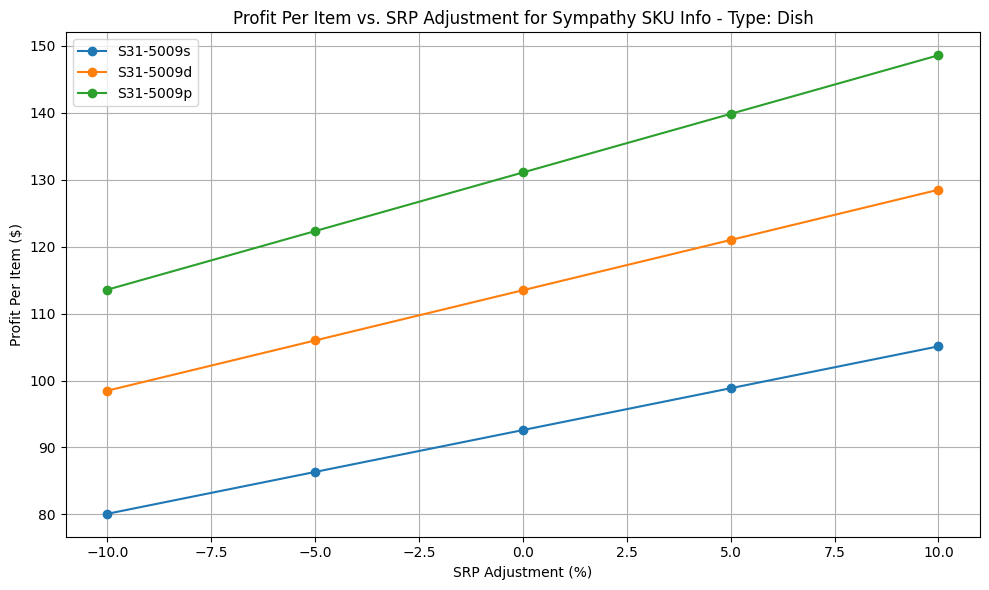

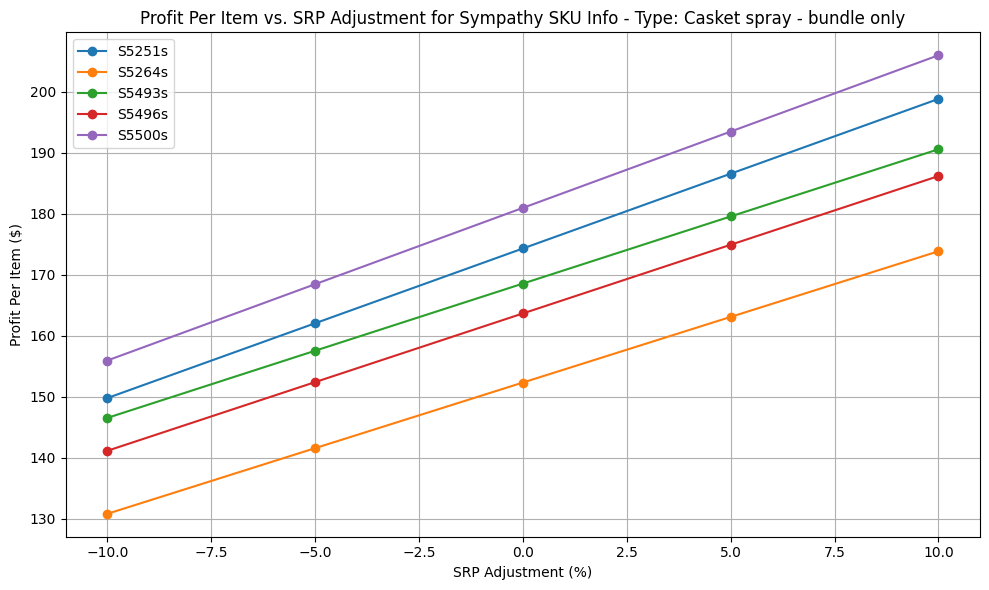

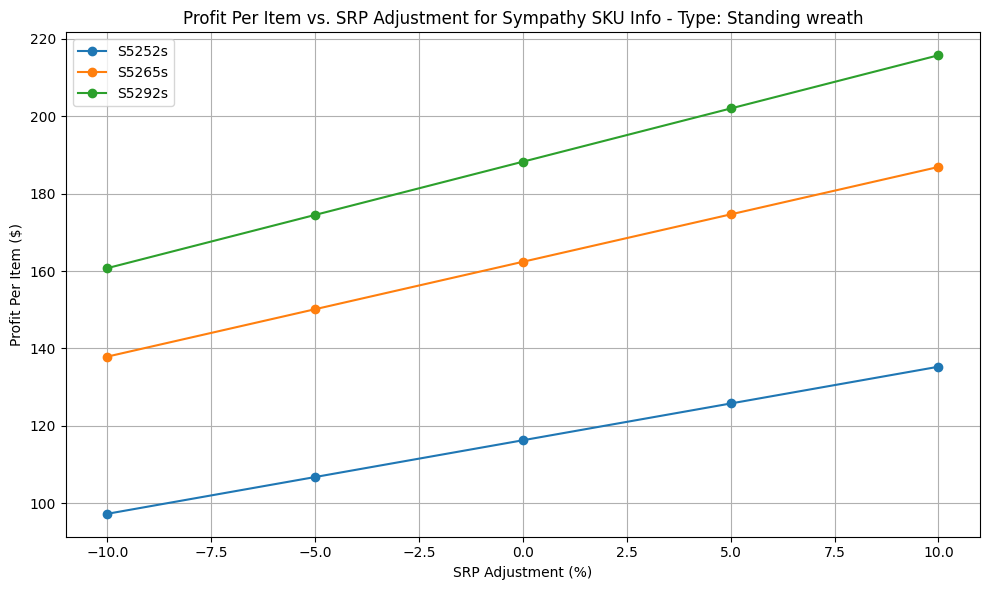

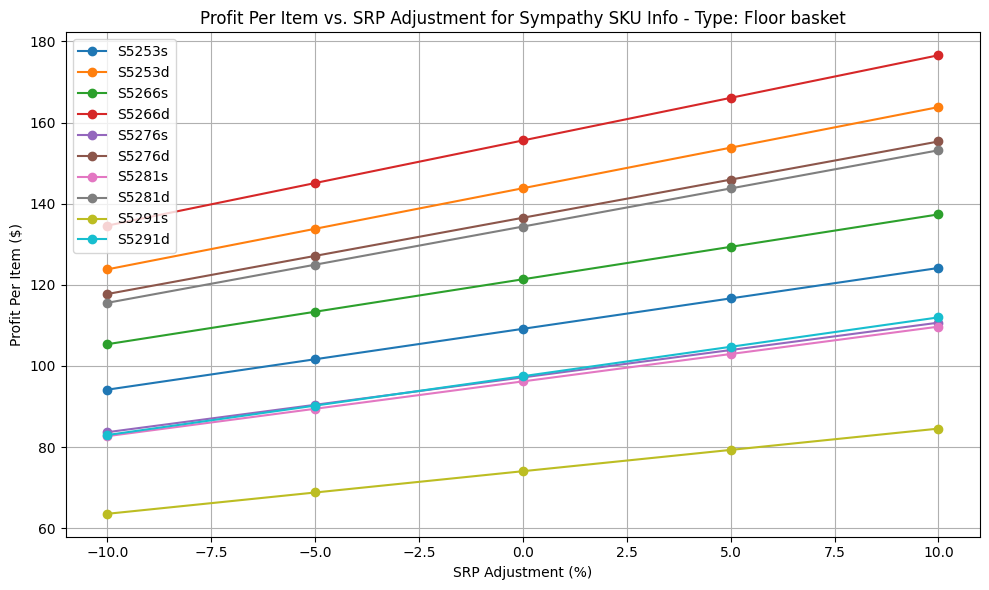

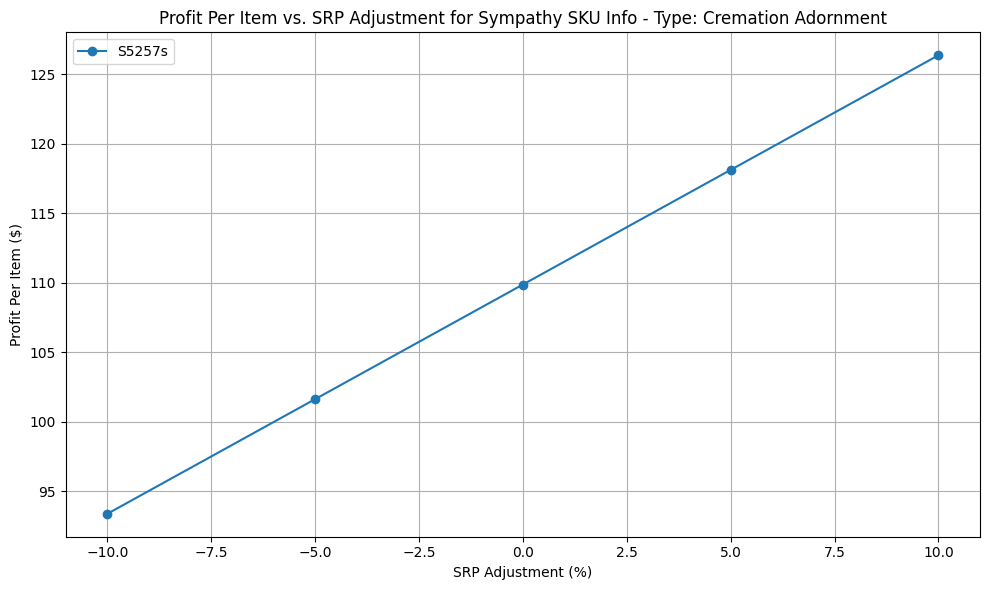

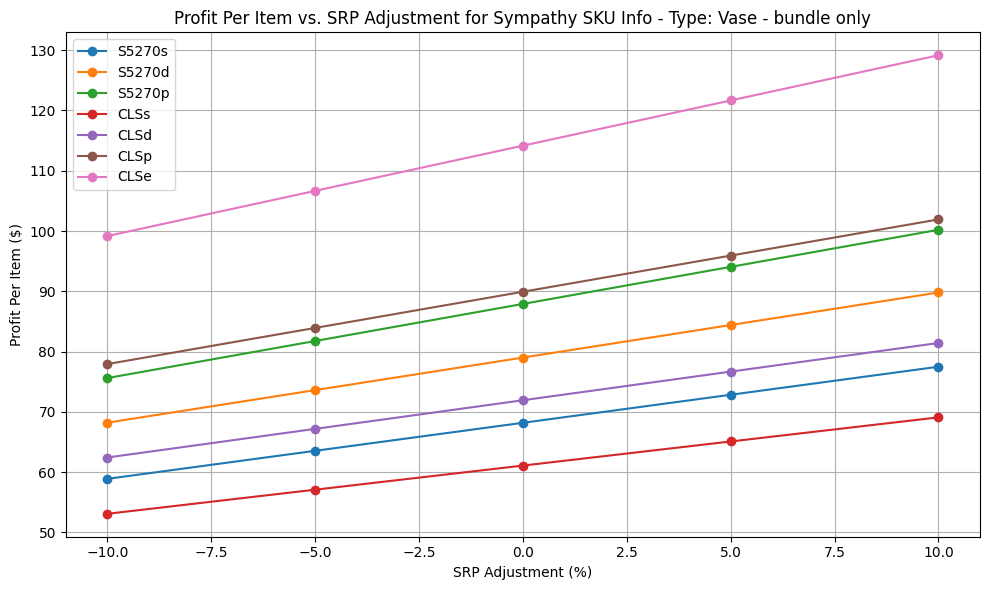

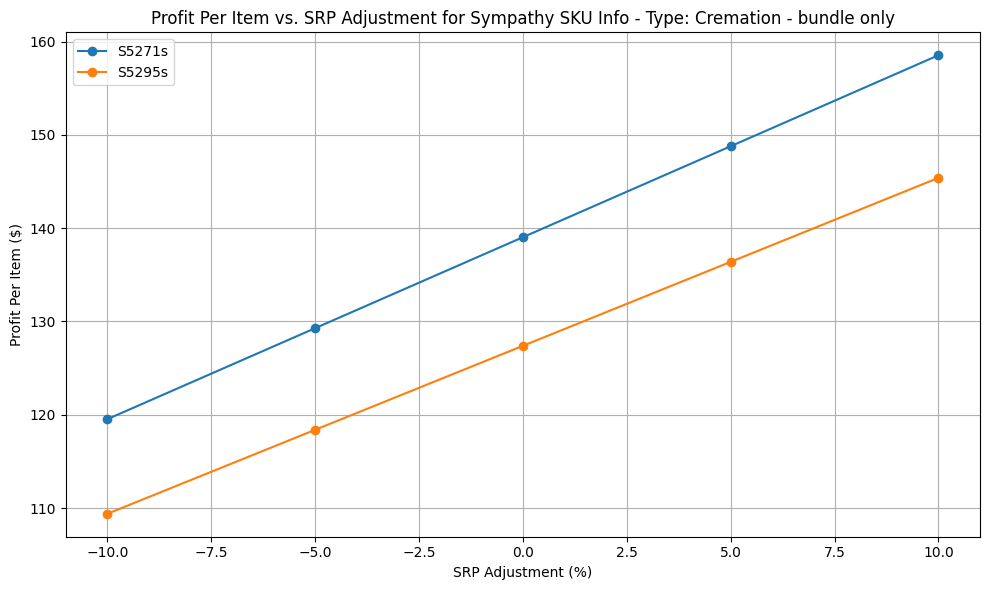

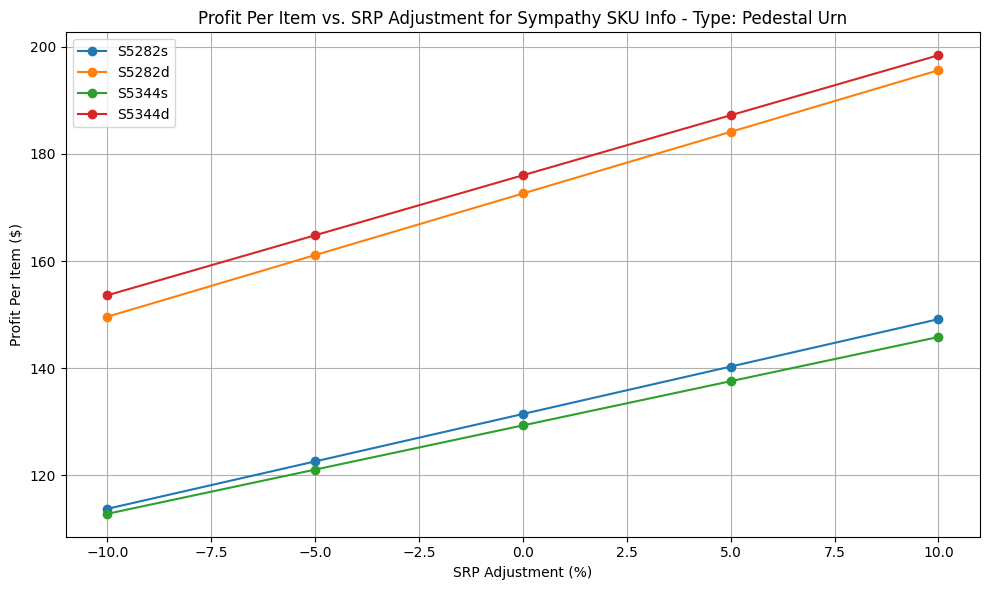

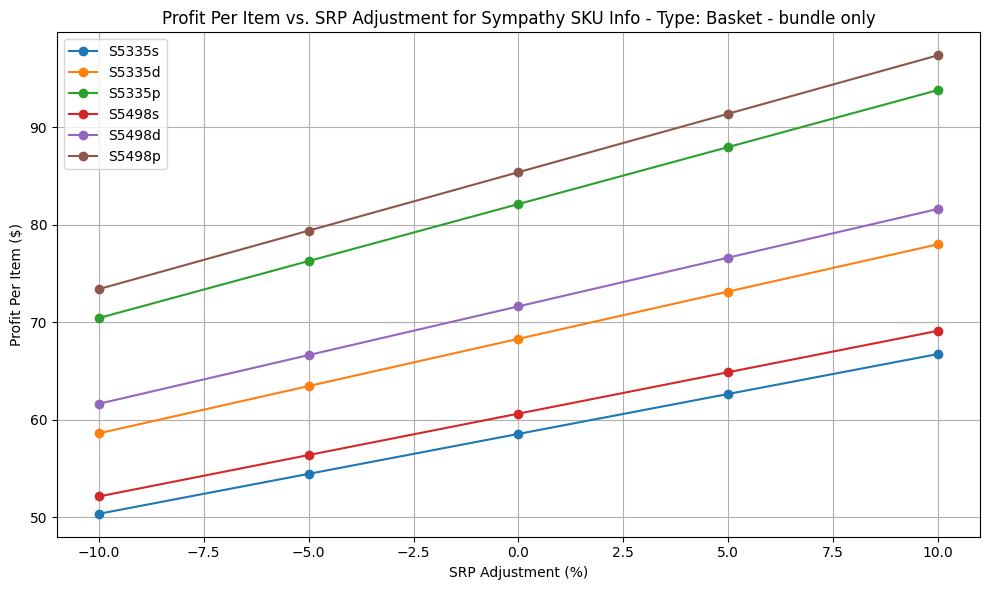

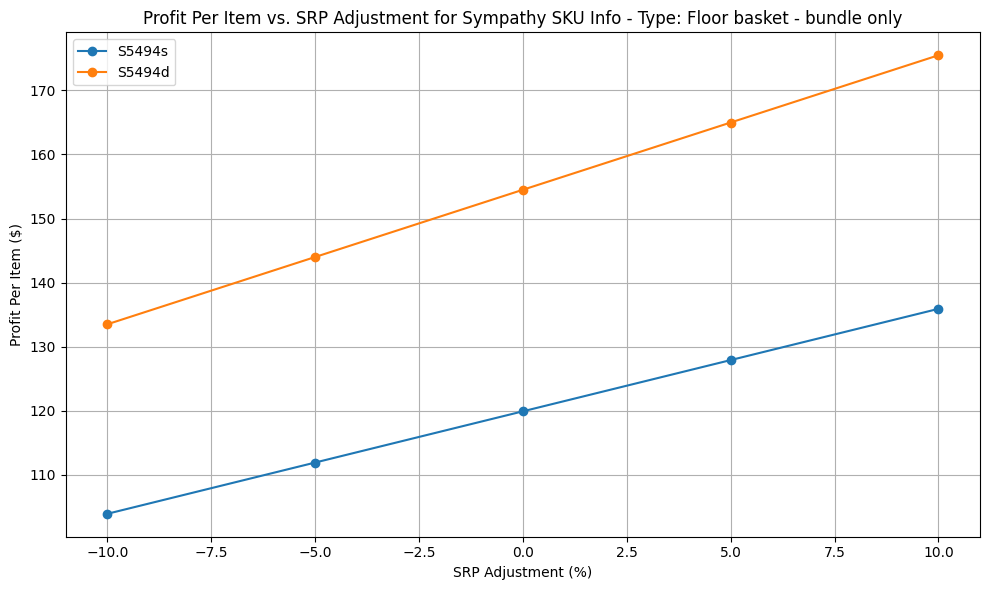

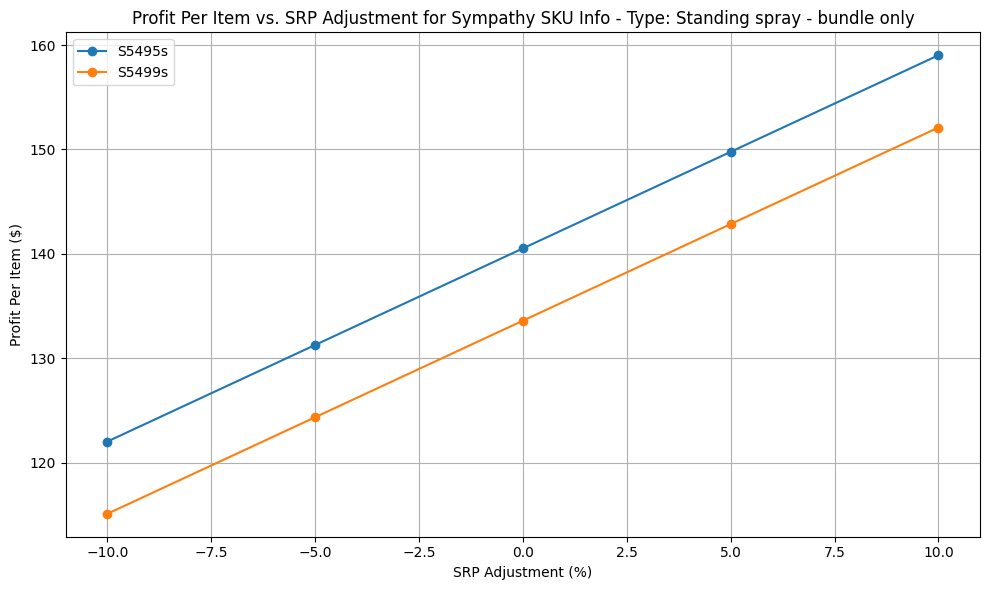

In [45]:
# Define a function to plot "Profit Per Item vs. SRP Adjustment" for each 'Type' in a given dataset
def plot_profit_vs_srp_by_type(data, dataset_name):
    types = data['Type'].unique()
    for type_ in types:
        type = data[data['Type'] == type_]
        
        # Calculate adjusted profit per item for each SKU and adjustment for the selected type
        adjusted_srps_type = np.outer(type['SRP'], (1 + adjustments))
        adjusted_profits_per_item_type = adjusted_srps_type - np.outer(type['Total Cost of Goods'], np.ones_like(adjustments))
        
        plt.figure(figsize=(10, 6))
        for idx, sku in enumerate(type['SKU']):
            plt.plot(adjustments*100, adjusted_profits_per_item_type[idx], marker='o', label=sku)
        
        plt.title(f'Profit Per Item vs. SRP Adjustment for {dataset_name} - Type: {type_}')
        plt.xlabel('SRP Adjustment (%)')
        plt.ylabel('Profit Per Item ($)')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# Plot for "Sympathy SKU Info" dataset
plot_profit_vs_srp_by_type(sympathy, "Sympathy SKU Info")


In [46]:
# Calculate current margins for both datasets
sympathy['Current Margin (%)'] = (sympathy['Profit ($)'] / sympathy['SRP']) * 100
eday['Current Margin (%)'] = (eday['Profit ($)'] / eday['SRP']) * 100

# Display the first few rows of the datasets with the current margins
sympathy_margins = sympathy[['SKU', 'Type', 'SRP', 'Profit ($)', 'Current Margin (%)']].head()
eday_margins = eday[['SKU', 'Type', 'SRP', 'Profit ($)', 'Current Margin (%)']].head()

sympathy_margins, eday_margins


(         SKU            Type  SRP  Profit ($)  Current Margin (%)
 0   S6-4447s  Standing spray  173       58.82                34.0
 1   S6-4447d  Standing spray  203       73.08                36.0
 2   S6-4447p  Standing spray  233       86.21                37.0
 3  S6-4447Fs  Standing spray  173       58.82                34.0
 4  S6-4447Fd  Standing spray  203       73.08                36.0,
       SKU      Type  SRP  Profit ($)  Current Margin (%)
 0  C5374s  FSG Vase   50        2.50                 5.0
 1  C5374d  FSG Vase   65        7.15                11.0
 2  C5374p  FSG Vase   75       10.50                14.0
 3  C5379s  FSG Vase   55        4.95                 9.0
 4  C5379d  FSG Vase   65        8.45                13.0)

In [47]:
# Calculate average profit for each group in the Sympathy dataset
sympathy_grouped = sympathy.groupby(['Size', 'Type']).agg({'Profit ($)': 'mean'}).reset_index()
sympathy_grouped['Dataset'] = 'Sympathy'

# Calculate average profit for each group in the EDay dataset
eday_grouped = eday.groupby(['Size', 'Type']).agg({'Profit ($)': 'mean'}).reset_index()
eday_grouped['Dataset'] = 'EDay'

# Combine the two grouped datasets
combined_grouped = pd.concat([sympathy_grouped, eday_grouped], ignore_index=True)

combined_grouped


,Size,Type,Profit ($),Dataset
0,Deluxe,Basket,29.095,Sympathy
1,Deluxe,Basket - bundle only,20.700,Sympathy
2,Deluxe,Dish,49.500,Sympathy
3,Deluxe,Floor basket,58.924,Sympathy
4,Deluxe,Floor basket - bundle only,73.500,Sympathy
...,...,...,...,...
60,Standard,Gold-Dipped Vase,20.825,EDay
61,Standard,Long Stem Roses,10.125,EDay
62,Standard,Smiley Mug,11.390,EDay
63,Standard,White Box,9.932,EDay


In [48]:
# Calculate the current total profit for each SKU in both datasets
sympathy['Total Profit'] = sympathy['Profit ($)'] * sympathy['Units']
eday['Total Profit'] = eday['Profit ($)'] * eday['Units']

# Display the first few rows of the datasets with the total profit
sympathy_total_profit = sympathy[['SKU', 'Type', 'SRP', 'Profit ($)', 'Units', 'Total Profit']].head()
eday_total_profit = eday[['SKU', 'Type', 'SRP', 'Profit ($)', 'Units', 'Total Profit']].head()

sympathy_total_profit, eday_total_profit


(         SKU            Type  SRP  Profit ($)   Units  Total Profit
 0   S6-4447s  Standing spray  173       58.82   316.0      18587.12
 1   S6-4447d  Standing spray  203       73.08   282.0      20608.56
 2   S6-4447p  Standing spray  233       86.21   312.0      26897.52
 3  S6-4447Fs  Standing spray  173       58.82  1034.0      60819.88
 4  S6-4447Fd  Standing spray  203       73.08   711.0      51959.88,
       SKU      Type  SRP  Profit ($)   Units  Total Profit
 0  C5374s  FSG Vase   50        2.50  3133.0       7832.50
 1  C5374d  FSG Vase   65        7.15  5595.0      40004.25
 2  C5374p  FSG Vase   75       10.50  3778.0      39669.00
 3  C5379s  FSG Vase   55        4.95  1803.0       8924.85
 4  C5379d  FSG Vase   65        8.45  4190.0      35405.50)

In [49]:
# Adjust SRP for each SKU in the Sympathy dataset based on desired profit and calculate potential new total profit
sympathy['Desired Profit'] = sympathy.apply(lambda row: combined_grouped[
    (combined_grouped['Size'] == row['Size']) & 
    (combined_grouped['Type'] == row['Type']) & 
    (combined_grouped['Dataset'] == 'Sympathy')]['Profit ($)'].values[0], axis=1)

sympathy['Adjusted SRP'] = sympathy['Total Cost of Goods'] + sympathy['Desired Profit']
sympathy['Potential New Total Profit'] = sympathy['Desired Profit'] * sympathy['Units']

# Adjust SRP for each SKU in the EDay dataset based on desired profit and calculate potential new total profit
eday['Desired Profit'] = eday.apply(lambda row: combined_grouped[
    (combined_grouped['Size'] == row['Size']) & 
    (combined_grouped['Type'] == row['Type']) & 
    (combined_grouped['Dataset'] == 'EDay')]['Profit ($)'].values[0], axis=1)

eday['Adjusted SRP'] = eday['Total Cost of Goods'] + eday['Desired Profit']
eday['Potential New Total Profit'] = eday['Desired Profit'] * eday['Units']

# Display the first few rows of the datasets with the adjusted SRP and potential new total profit
sympathy_adjusted = sympathy[['SKU', 'Type', 'SRP', 'Adjusted SRP', 'Total Profit', 'Potential New Total Profit']].head()
eday_adjusted = eday[['SKU', 'Type', 'SRP', 'Adjusted SRP', 'Total Profit', 'Potential New Total Profit']].head()

sympathy_adjusted, eday_adjusted


(         SKU            Type  SRP  Adjusted SRP  Total Profit  \
 0   S6-4447s  Standing spray  173    106.148333      18587.12   
 1   S6-4447d  Standing spray  203    126.796667      20608.56   
 2   S6-4447p  Standing spray  233    148.393333      26897.52   
 3  S6-4447Fs  Standing spray  173    106.148333      60819.88   
 4  S6-4447Fd  Standing spray  203    126.796667      51959.88   
 
    Potential New Total Profit  
 0                19702.073333  
 1                21470.540000  
 2                28321.280000  
 3                64468.176667  
 4                54133.170000  ,
       SKU      Type  SRP  Adjusted SRP  Total Profit  \
 0  C5374s  FSG Vase   50     19.295714       7832.50   
 1  C5374d  FSG Vase   65     30.220000      40004.25   
 2  C5374p  FSG Vase   75     40.752857      39669.00   
 3  C5379s  FSG Vase   55     20.515714       8924.85   
 4  C5379d  FSG Vase   65     29.220000      35405.50   
 
    Potential New Total Profit  
 0                22481.51

In [50]:
# Extracting the relevant columns

sympathy_cogs = sympathy[['SKU', 'SRP', 'Total Cost of Goods']]

eday_cogs = eday[['SKU', 'SRP', 'Total Cost of Goods']]



sympathy_cogs.head(), eday_cogs.head()

(         SKU  SRP  Total Cost of Goods
 0   S6-4447s  173                43.80
 1   S6-4447d  203                50.66
 2   S6-4447p  233                57.62
 3  S6-4447Fs  173                43.80
 4  S6-4447Fd  203                50.66,
       SKU  SRP  Total Cost of Goods
 0  C5374s   50                12.12
 1  C5374d   65                18.06
 2  C5374p   75                22.07
 3  C5379s   55                13.34
 4  C5379d   65                17.06)

In [51]:
# Get unique combinations of 'Type' and 'Size' for both datasets
unique_combinations_sympathy = sympathy[['Type', 'Size']].drop_duplicates().sort_values(['Type', 'Size'])
unique_combinations_eday = eday[['Type', 'Size']].drop_duplicates().sort_values(['Type', 'Size'])

unique_combinations_sympathy, unique_combinations_eday

(                            Type       Size
 11                        Basket     Deluxe
 13                        Basket  Exquisite
 12                        Basket    Premium
 10                        Basket   Standard
 70          Basket - bundle only     Deluxe
 71          Basket - bundle only    Premium
 69          Basket - bundle only   Standard
 20    Casket spray - bundle only   Standard
 33       Cremation - bundle only   Standard
 24           Cremation Adornment   Standard
 18                          Dish     Deluxe
 19                          Dish    Premium
 17                          Dish   Standard
 23                  Floor basket     Deluxe
 22                  Floor basket   Standard
 85    Floor basket - bundle only     Deluxe
 84    Floor basket - bundle only   Standard
 43                  Pedestal Urn     Deluxe
 42                  Pedestal Urn   Standard
 1                 Standing spray     Deluxe
 2                 Standing spray    Premium
 0        

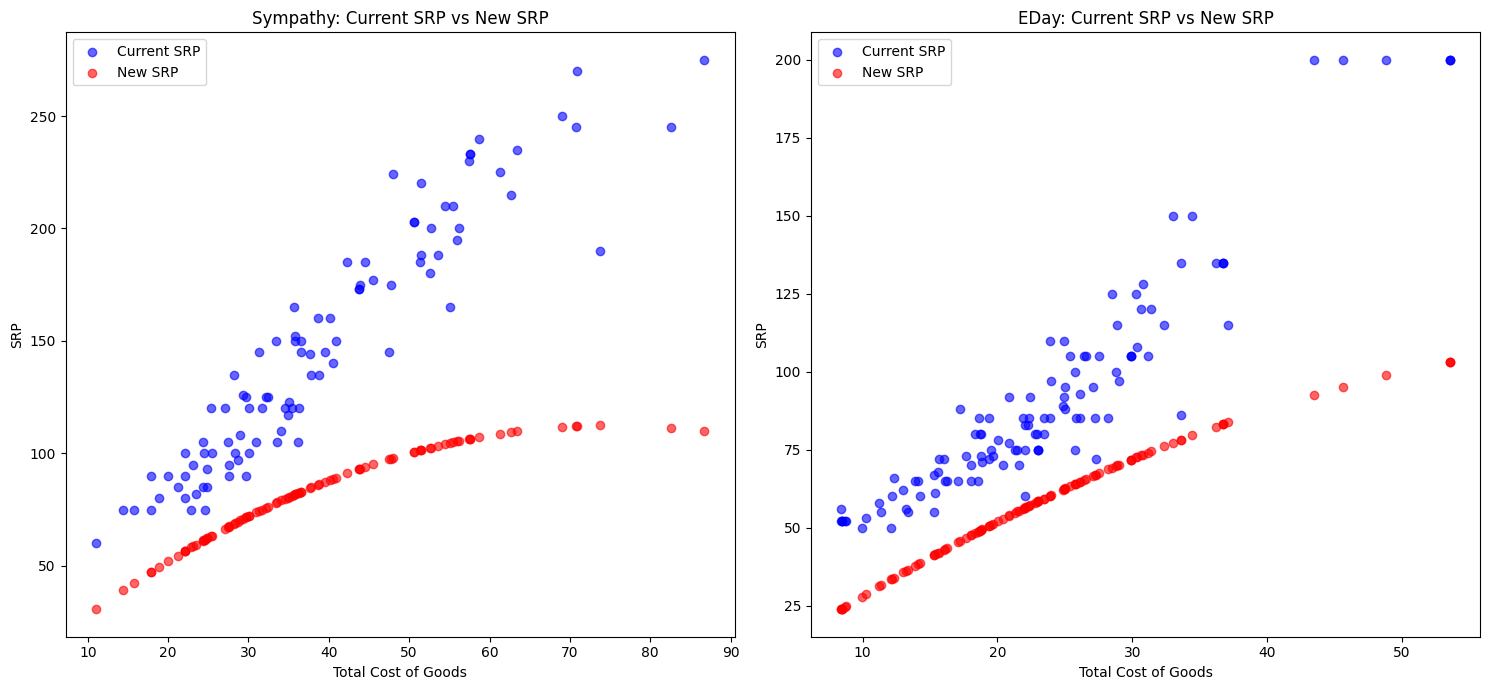

In [52]:
# Initial values for alpha and beta
alpha = 2
beta = 0.01

# Calculate new SRPs based on the parabolic pricing model
sympathy['New SRP'] = sympathy['Total Cost of Goods'] + alpha * sympathy['Total Cost of Goods'] * (1 - beta * sympathy['Total Cost of Goods'])
eday['New SRP'] = eday['Total Cost of Goods'] + alpha * eday['Total Cost of Goods'] * (1 - beta * eday['Total Cost of Goods'])

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


In [53]:
# Given values
COGS_sample = 50
alpha_sympathy = 1.5
beta_sympathy = 60

# Calculating New SRP
new_SRP_sample = COGS_sample * (alpha_sympathy + (beta_sympathy / COGS_sample))
new_SRP_sample


135.0

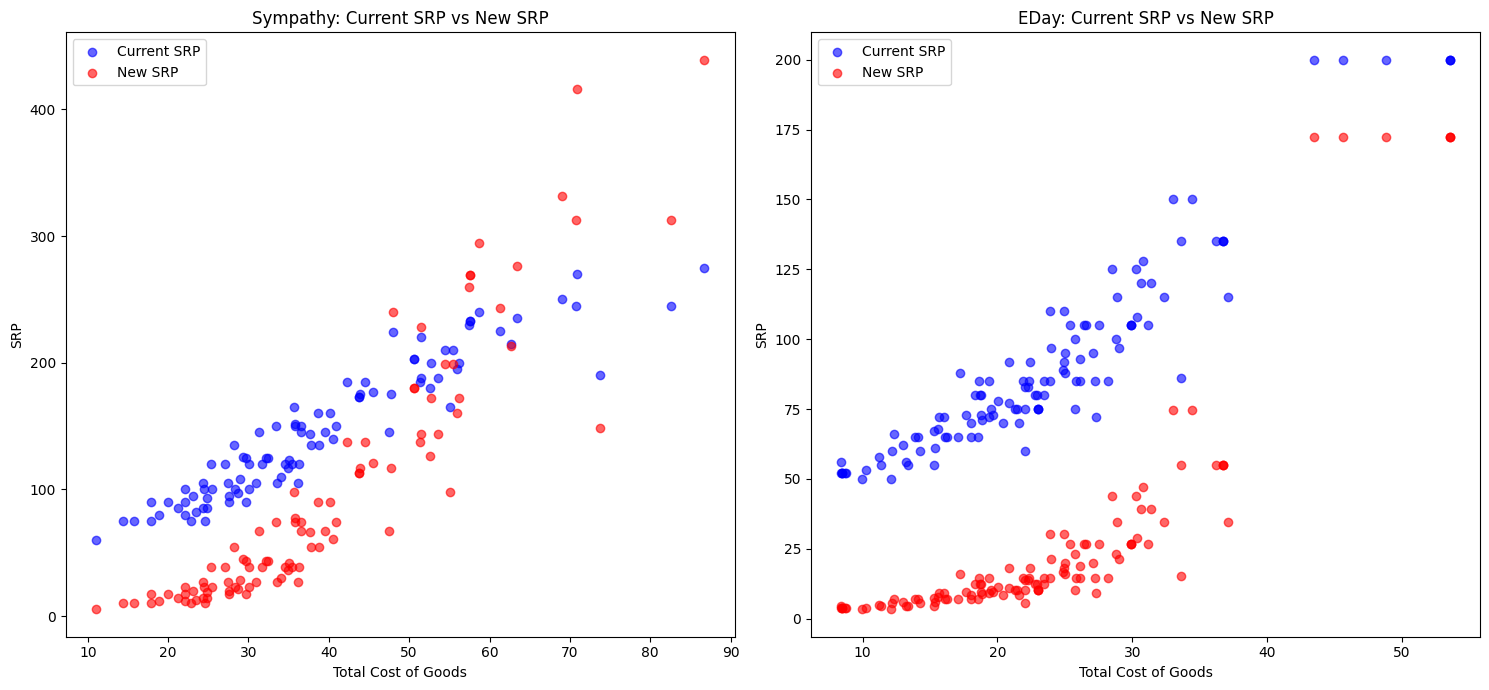

In [54]:
# Initial values for A, B, and C based on the new quadratic formula
A = 1.5*(10**-3)
B = 0.3*(10**-3)
C = 0.02*(10**-3)

# Calculate new SRPs based on the adjusted formula
sympathy['New SRP'] = A * sympathy['SRP'] + B * sympathy['SRP']**2 + C * sympathy['SRP']**3
eday['New SRP'] = A * eday['SRP'] + B * eday['SRP']**2 + C * eday['SRP']**3

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


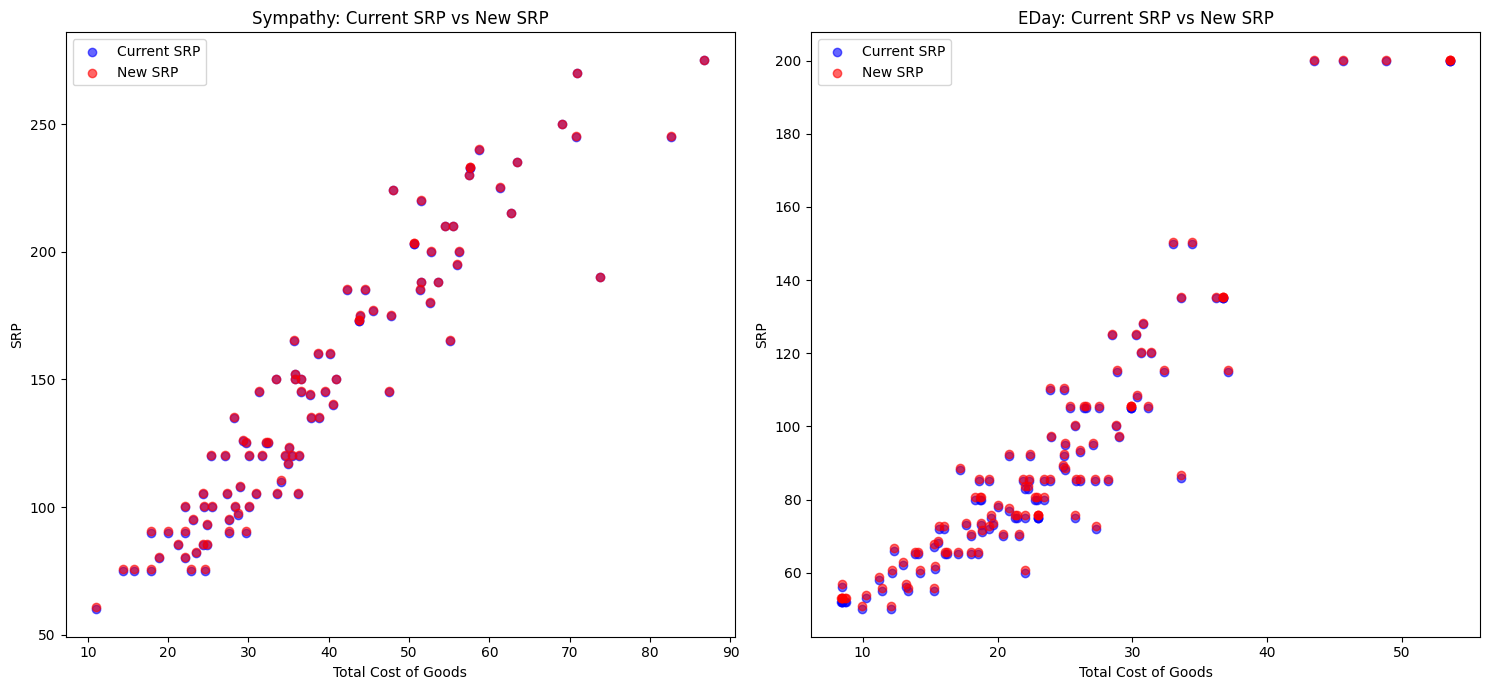

In [55]:
# Define a function for the proposed pricing model
def linear_markup(srp, k):
    return srp + k / (srp + 1)

# Define the constant k for the markup
k = 50

# Calculate new SRPs based on the linear markup model
sympathy['New SRP'] = linear_markup(sympathy['SRP'], k)
eday['New SRP'] = linear_markup(eday['SRP'], k)

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


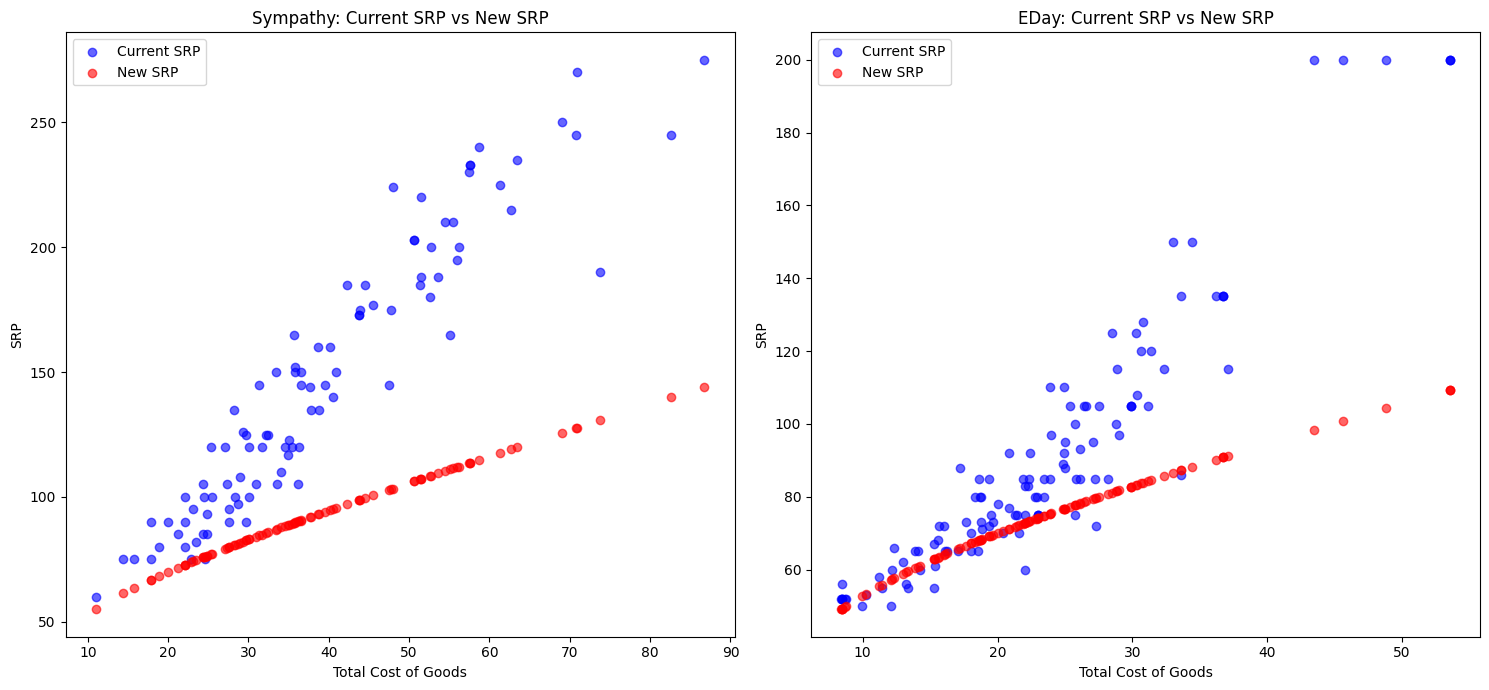

In [56]:
# Defining the formula
def inverse_pricing(cogs, alpha, beta):
    return cogs * (1 + alpha / (cogs + beta))

# Initial values for alpha and beta
alpha = 60  # This will help control the initial markup
beta = 4   # This will control how quickly the markup drops as COGS increases

# Calculate new SRPs based on the inverse pricing model
sympathy['New SRP'] = sympathy['Total Cost of Goods'].apply(lambda cogs: inverse_pricing(cogs, alpha, beta))
eday['New SRP'] = eday['Total Cost of Goods'].apply(lambda cogs: inverse_pricing(cogs, alpha, beta))

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


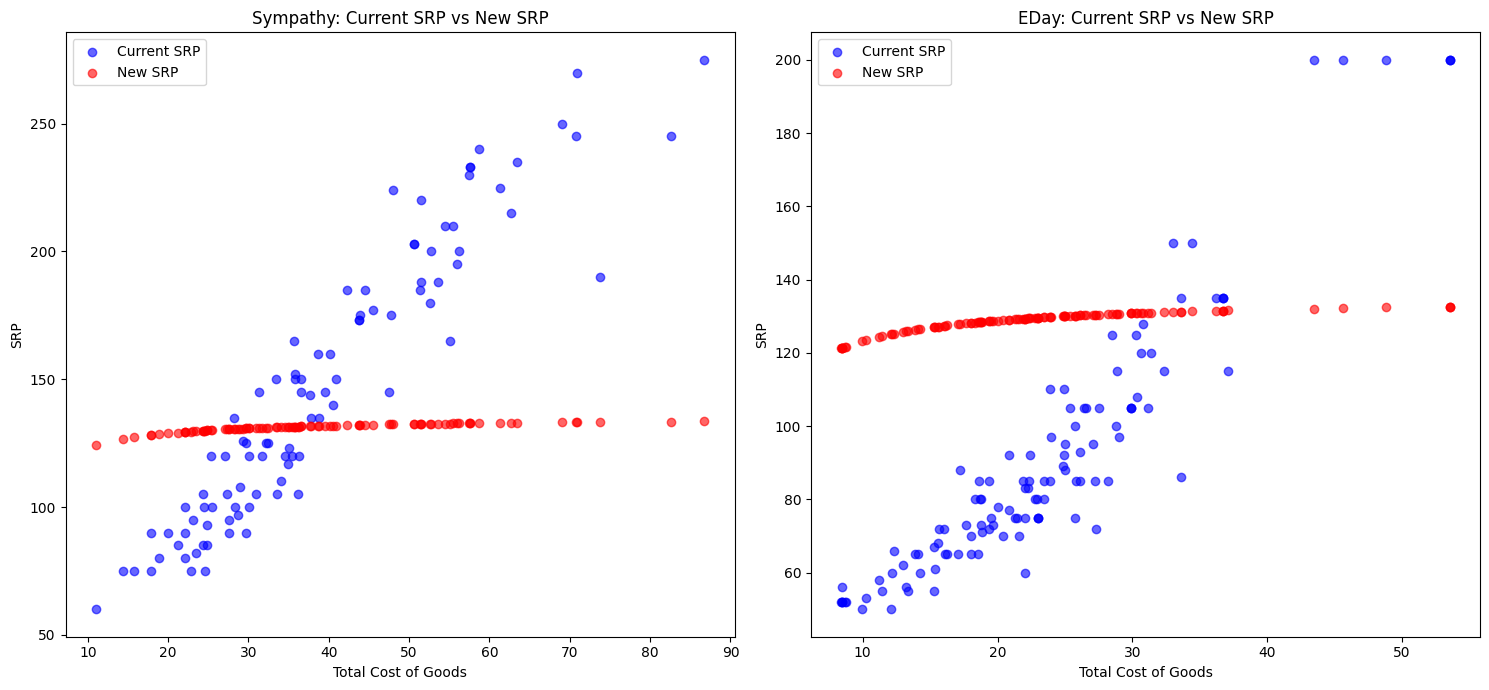

In [57]:
# Adjusting the formula parameters
base_multiplier = 130  # Increased from 100
base_addition = 5

# Calculate new SRPs based on the inverse pricing model
sympathy['New SRP'] = (base_multiplier / (sympathy['Total Cost of Goods'] + 1)) * sympathy['Total Cost of Goods'] + base_addition
eday['New SRP'] = (base_multiplier / (eday['Total Cost of Goods'] + 1)) * eday['Total Cost of Goods'] + base_addition

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


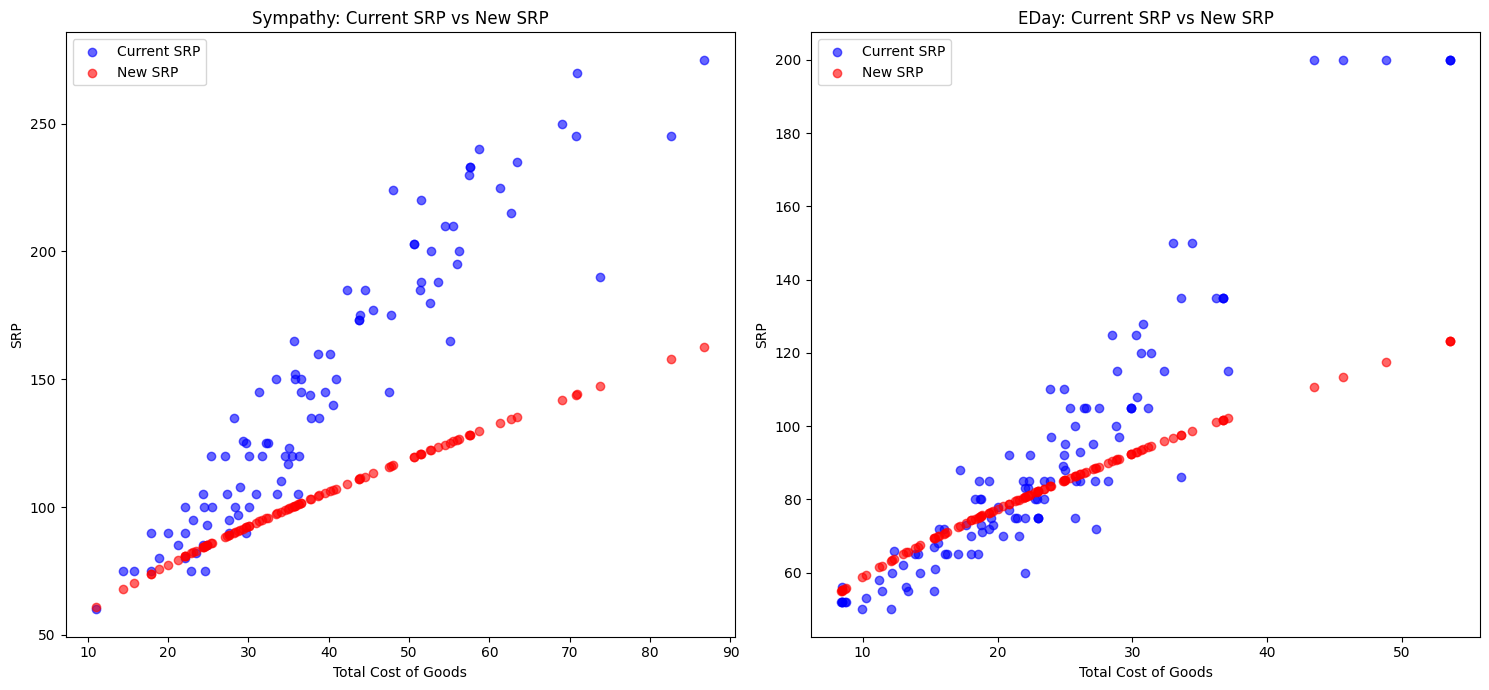

In [58]:
import numpy as np

# Define the logarithmic pricing function
def logarithmic_pricing(cogs, a, b):
    return cogs + a + b * np.log(cogs)

# Initial constants for the logarithmic function
a = 20
b = 12.5

# Apply the function to calculate the new SRP
sympathy['New SRP'] = logarithmic_pricing(sympathy['Total Cost of Goods'], a, b)
eday['New SRP'] = logarithmic_pricing(eday['Total Cost of Goods'], a, b)

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


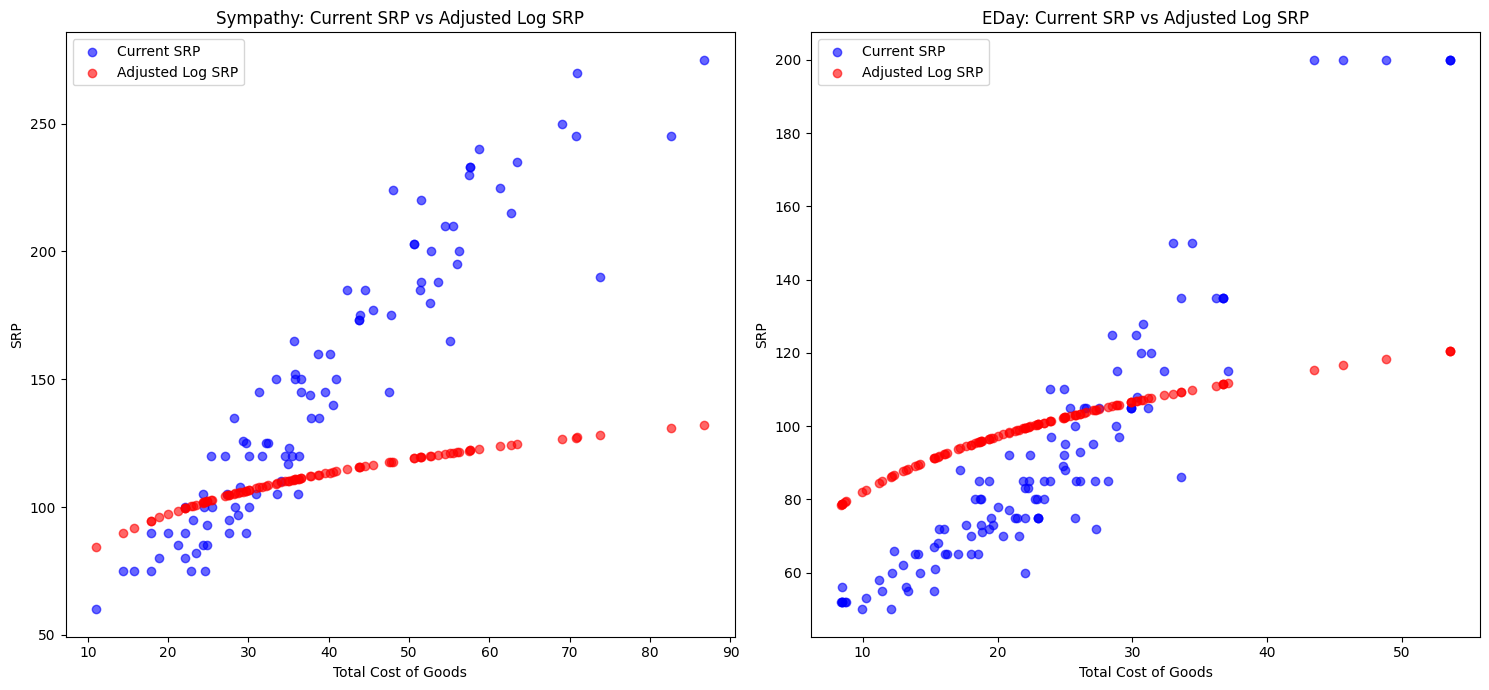

In [59]:
# Adjusting the parameters of the logarithmic function to closely match the current SRP for low-mid range COGs
# while ensuring that higher COGs don't have an extremely high SRP.

def adjusted_log_srp(cogs, base_price, scale_factor, log_factor):
    return base_price + scale_factor * np.log(cogs + log_factor)

# Parameters to adjust
base_price = 20
scale_factor = 25
log_factor = 2

# Calculate new SRPs based on the adjusted logarithmic pricing model
sympathy['Adjusted Log SRP'] = adjusted_log_srp(sympathy['Total Cost of Goods'], base_price, scale_factor, log_factor)
eday['Adjusted Log SRP'] = adjusted_log_srp(eday['Total Cost of Goods'], base_price, scale_factor, log_factor)

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['Adjusted Log SRP'], color='red', label='Adjusted Log SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs Adjusted Log SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['Adjusted Log SRP'], color='red', label='Adjusted Log SRP', alpha=0.6)
plt.title('EDay: Current SRP vs Adjusted Log SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


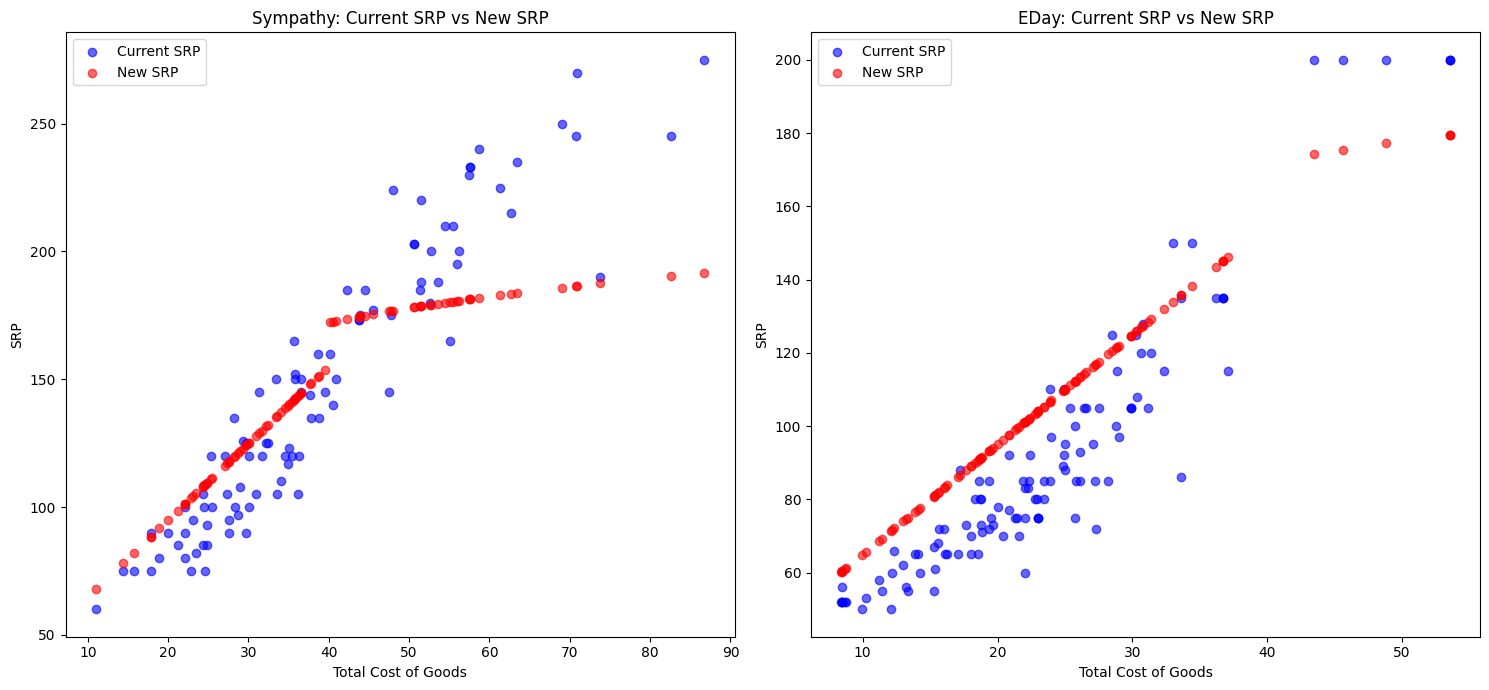

In [60]:
# Defining the piecewise function
def piecewise_pricing(cogs, a, b, c, d, threshold=40):
    if cogs <= threshold:
        return a * cogs + b
    else:
        return c * np.log(cogs) + d

# We'll need to choose constants a, b, c, and d.
# For simplicity, let's start with a=2 and b=10 for the linear part (a rough guess based on prior observations).
# For the logarithmic part, we'll choose c=25 and d=100 as initial guesses.
a, b = 3, 35
c, d = 25, 80

# Calculate new SRP based on the piecewise function
sympathy['New SRP'] = sympathy['Total Cost of Goods'].apply(lambda x: piecewise_pricing(x, a, b, c, d))
eday['New SRP'] = eday['Total Cost of Goods'].apply(lambda x: piecewise_pricing(x, a, b, c, d))

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


In [61]:
from sklearn.linear_model import LinearRegression

# Linear regression for Sympathy data
regressor_sympathy = LinearRegression()
X_sympathy = sympathy['Total Cost of Goods'].values.reshape(-1, 1)
y_sympathy = sympathy['SRP'].values
regressor_sympathy.fit(X_sympathy, y_sympathy)
y_pred_sympathy = regressor_sympathy.predict(X_sympathy)

# Linear regression for EDay data
regressor_eday = LinearRegression()
X_eday = eday['Total Cost of Goods'].values.reshape(-1, 1)
y_eday = eday['SRP'].values
regressor_eday.fit(X_eday, y_eday)
y_pred_eday = regressor_eday.predict(X_eday)

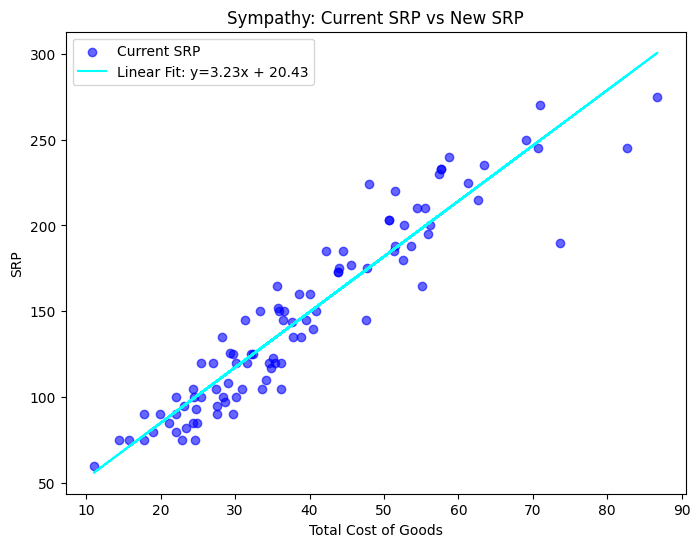

In [62]:
plt.figure(figsize=(8, 6))

# Sympathy
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.plot(sympathy['Total Cost of Goods'], y_pred_sympathy, color='cyan', label=f'Linear Fit: y={regressor_sympathy.coef_[0]:.2f}x + {regressor_sympathy.intercept_:.2f}')
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()
plt.show()


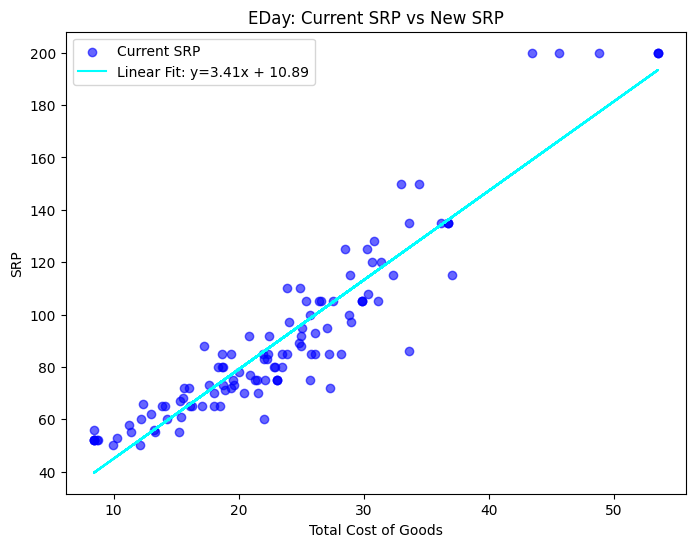

In [63]:
plt.figure(figsize=(8, 6))

# EDay
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.plot(eday['Total Cost of Goods'], y_pred_eday, color='cyan', label=f'Linear Fit: y={regressor_eday.coef_[0]:.2f}x + {regressor_eday.intercept_:.2f}')
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()
plt.show()


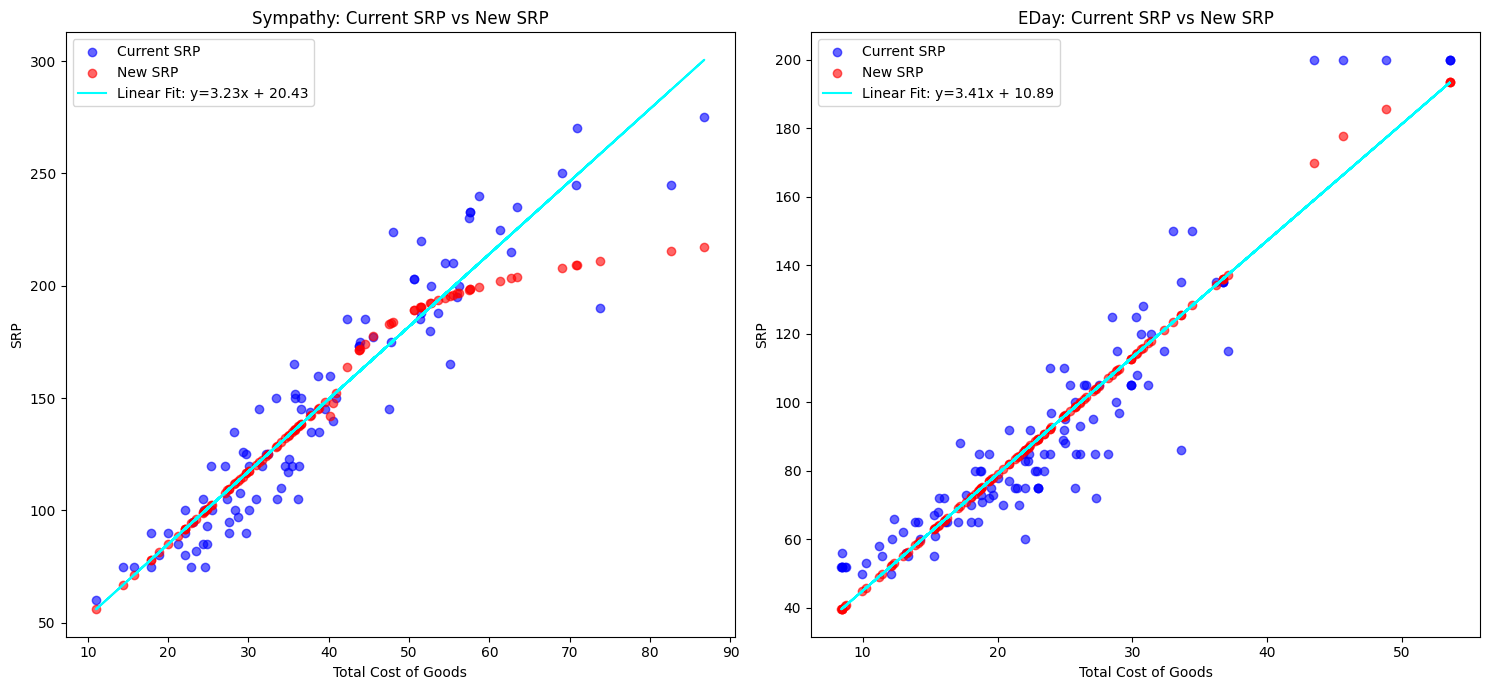

In [64]:
# Defining the piecewise function
cogs_PW = 40
def piecewise_pricing(cogs, m, b, c, d):
    if cogs <= cogs_PW:
        return m * cogs + b
    else:
        return c + d * np.log(cogs - cogs_PW + 1)

# Separate constants for EDay and Sympathy
m_sympathy, b_sympathy, c_sympathy, d_sympathy = 3.23, 20.43, 140, 20
m_eday, b_eday, c_eday, d_eday = 3.41, 10.89, 140, 20
# Calculate new SRPs based on the piecewise function
sympathy['New SRP'] = sympathy['Total Cost of Goods'].apply(lambda x: piecewise_pricing(x, m_sympathy, b_sympathy, c_sympathy, d_sympathy))
eday['New SRP'] = eday['Total Cost of Goods'].apply(lambda x: piecewise_pricing(x, m_eday, b_eday, c_eday, d_eday))
# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.plot(sympathy['Total Cost of Goods'], y_pred_sympathy, color='cyan', label=f'Linear Fit: y={regressor_sympathy.coef_[0]:.2f}x + {regressor_sympathy.intercept_:.2f}')
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.plot(eday['Total Cost of Goods'], y_pred_eday, color='cyan', label=f'Linear Fit: y={regressor_eday.coef_[0]:.2f}x + {regressor_eday.intercept_:.2f}')
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


In [65]:
# Define the plotting function with regression lines added
def plot_and_save_with_regression(data, category, filename, regressor):
    plt.figure(figsize=(8, 6))
    
    # Plot data
    plt.scatter(data['Total Cost of Goods'], data['SRP'], color='blue', label='Current SRP', alpha=0.6)
    plt.scatter(data['Total Cost of Goods'], data['New SRP'], color='red', label='New SRP', alpha=0.6)
    
    # Add regression line
    x = np.linspace(min(data['Total Cost of Goods']), max(data['Total Cost of Goods']), 100)
    y = regressor.predict(x.reshape(-1, 1))
    plt.plot(x, y, color='cyan', linestyle='--', label='Regression Line')
    
    # Title and labels
    plt.title(f'{category}: Current SRP vs New SRP')
    plt.xlabel('Total Cost of Goods')
    plt.ylabel('SRP')
    plt.legend()
    
    # Save the plot
    plt.savefig(filename)
    plt.close()

# Plot and save for both categories with regression lines
plot_and_save_with_regression(sympathy, "Sympathy", "/Users/cancel/Documents/Personal/Career and Work/FTD/FTD Profit//Graphs/sympathy_plot.png", regressor_sympathy)
plot_and_save_with_regression(eday, "EDay", "/Users/cancel/Documents/Personal/Career and Work/FTD/FTD Profit//Graphs/eday_plot.png", regressor_eday)


"/Users/cancel/Documents/Personal/Career and Work/FTD/FTD Profit//Graphs/sympathy_plot.png", "/Users/cancel/Documents/Personal/Career and Work/FTD/FTD Profit//Graphs/eday_plot.png"


('/Users/cancel/Documents/Personal/Career and Work/FTD/FTD Profit//Graphs/sympathy_plot.png',
 '/Users/cancel/Documents/Personal/Career and Work/FTD/FTD Profit//Graphs/eday_plot.png')

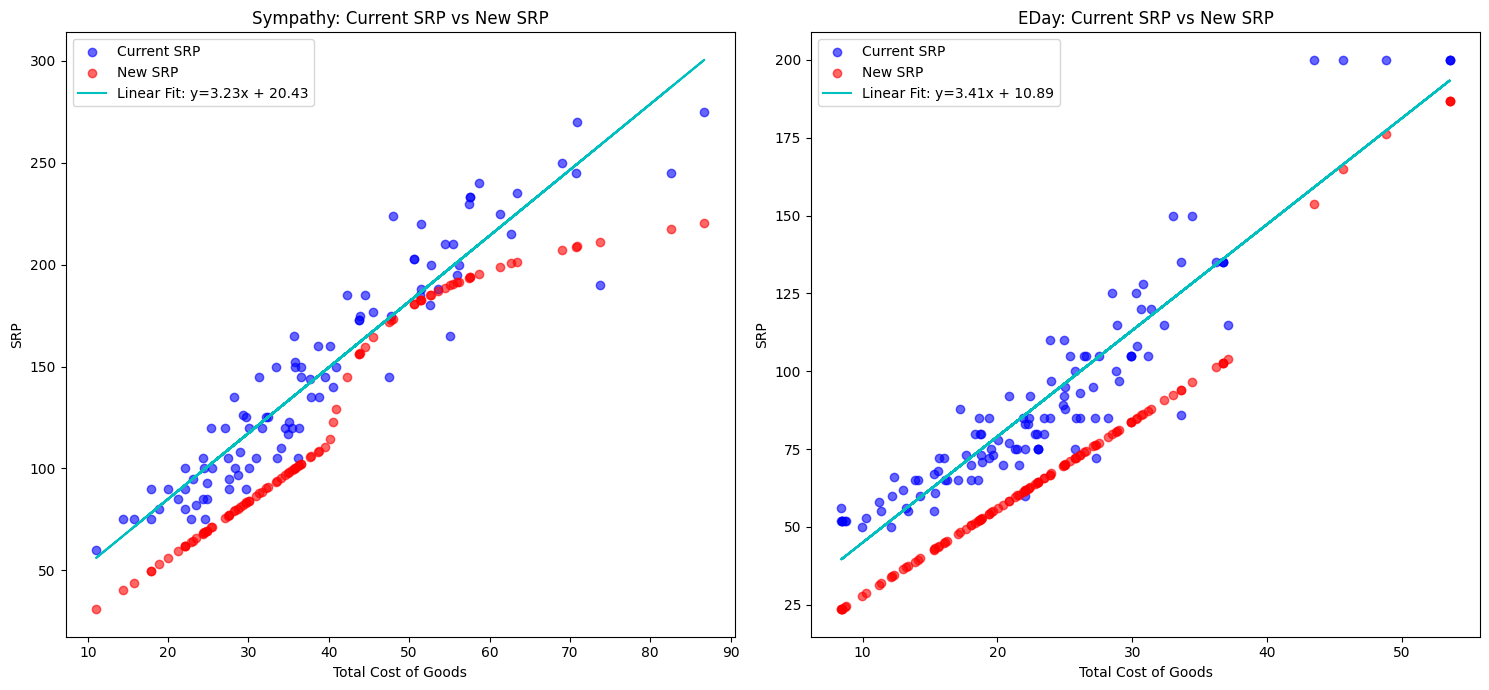

In [66]:
# Define the piecewise function based on the given formulas
def piecewise_pricing_simple(cogs):
    if cogs <= 40:
        return 2.8 * cogs
    else:
        return 2.8 * 40 + 28 * np.log(cogs - 39)

# Apply the piecewise function for both datasets
sympathy['New SRP'] = sympathy['Total Cost of Goods'].apply(piecewise_pricing_simple)
eday['New SRP'] = eday['Total Cost of Goods'].apply(piecewise_pricing_simple)

# Plotting the results with regression lines
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.plot(sympathy['Total Cost of Goods'], y_pred_sympathy, color='c', label=f'Linear Fit: y={regressor_sympathy.coef_[0]:.2f}x + {regressor_sympathy.intercept_:.2f}')
plt.title('Sympathy: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Current SRP', alpha=0.6)
plt.scatter(eday['Total Cost of Goods'], eday['New SRP'], color='red', label='New SRP', alpha=0.6)
plt.plot(eday['Total Cost of Goods'], y_pred_eday, color='c', label=f'Linear Fit: y={regressor_eday.coef_[0]:.2f}x + {regressor_eday.intercept_:.2f}')
plt.title('EDay: Current SRP vs New SRP')
plt.xlabel('Total Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()


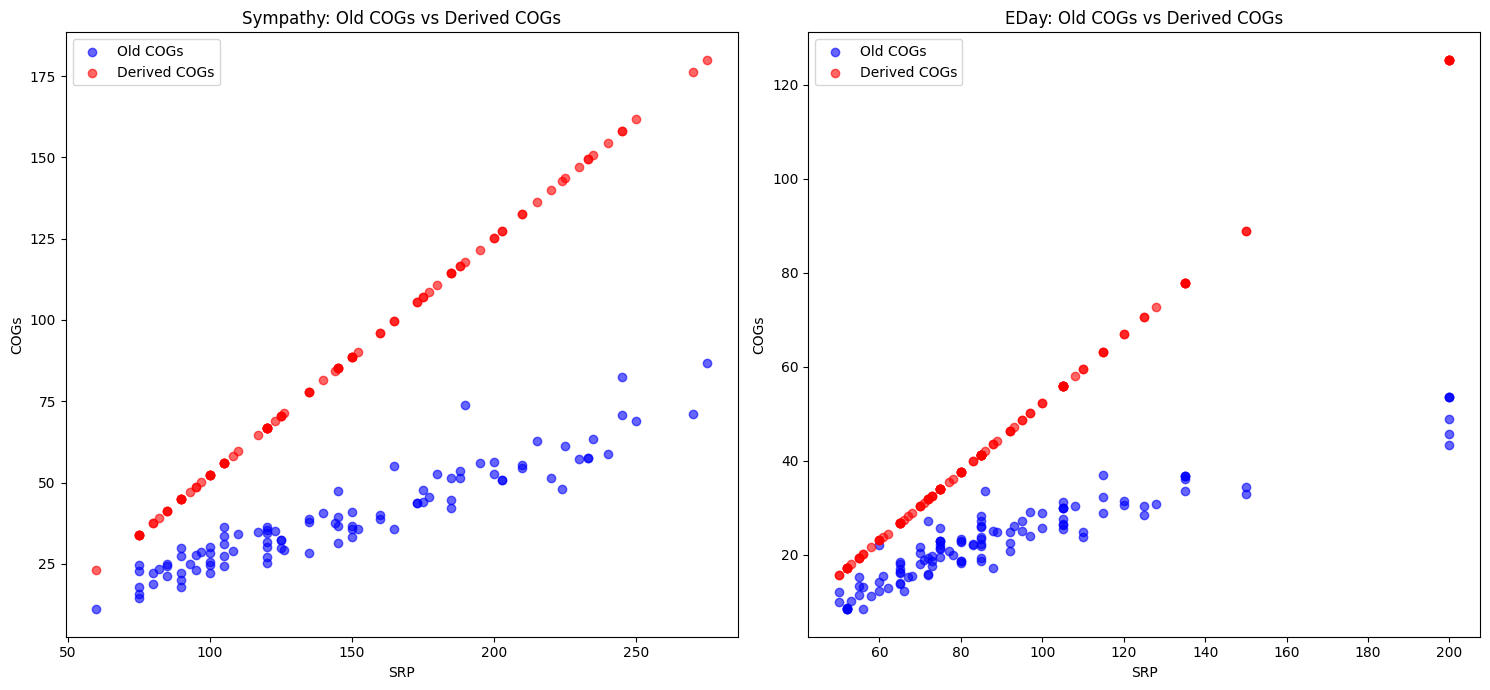

In [77]:
# Define the COGs calculation function based on consistent margin and SRP
other_costs = 20.74

def calculate_cogs(srp, margin):
    return srp * (1 - margin) - other_costs

# Set a consistent margin (e.g., 60% for demonstration purposes)
margin = 0.60

# Calculate new COGs based on the SRP and margin
sympathy['Derived COGs'] = sympathy['SRP'].apply(lambda x: calculate_cogs(x, margin))
eday['Derived COGs'] = eday['SRP'].apply(lambda x: calculate_cogs(x, margin))

# Plotting the results
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['SRP'], sympathy['Total Cost of Goods'], color='blue', label='Old COGs', alpha=0.6)
plt.scatter(sympathy['SRP'], sympathy['Derived COGs'], color='red', label='Derived COGs', alpha=0.6)
plt.title('Sympathy: Old COGs vs Derived COGs')
plt.xlabel('SRP')
plt.ylabel('COGs')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['SRP'], eday['Total Cost of Goods'], color='blue', label='Old COGs', alpha=0.6)
plt.scatter(eday['SRP'], eday['Derived COGs'], color='red', label='Derived COGs', alpha=0.6)
plt.title('EDay: Old COGs vs Derived COGs')
plt.xlabel('SRP')
plt.ylabel('COGs')
plt.legend()

plt.tight_layout()
plt.show()


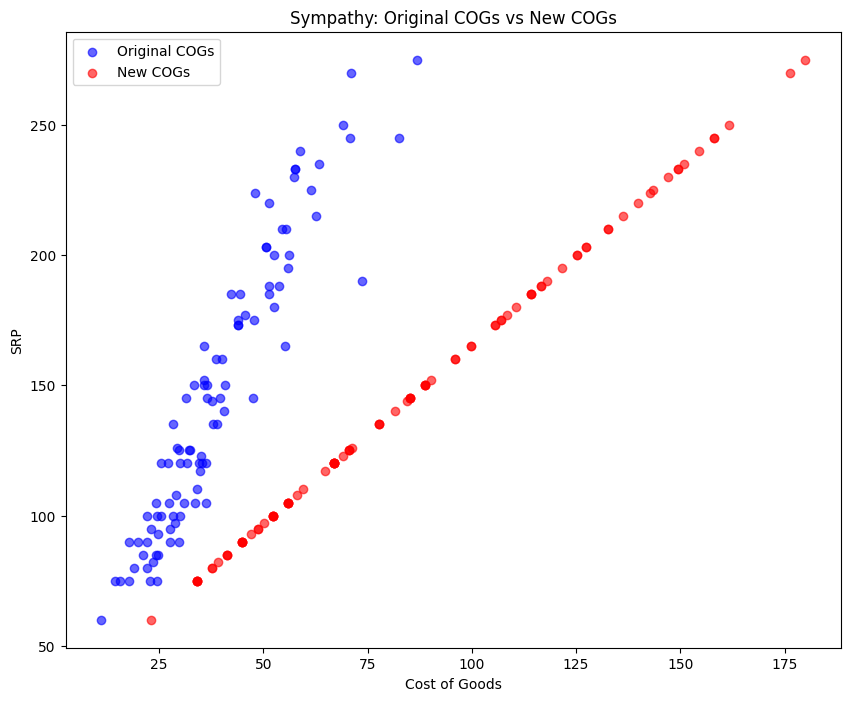

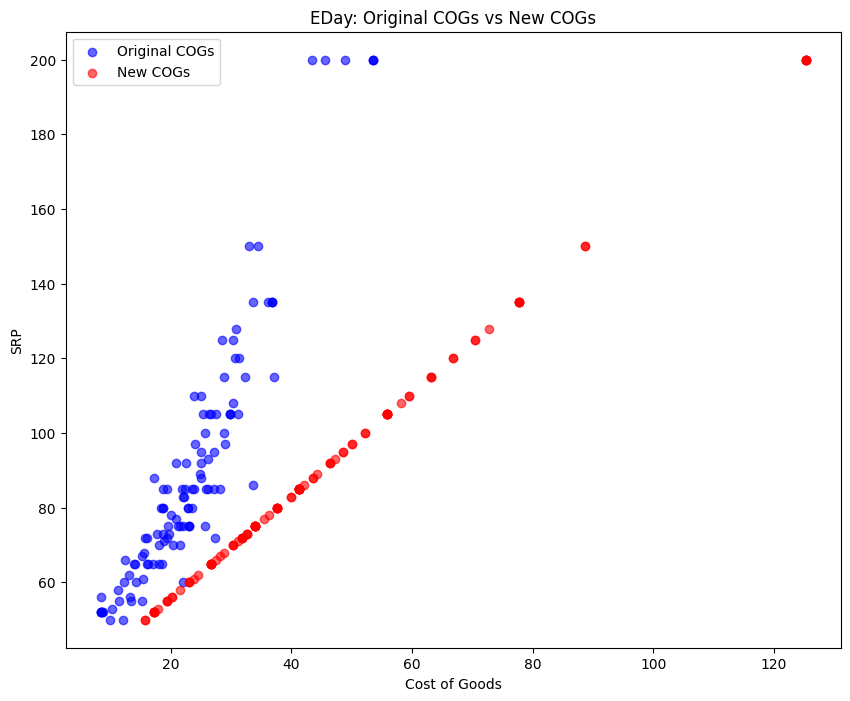

In [89]:
# Plotting the comparison between original and new COGs for Sympathy
plt.figure(figsize=(10, 8))
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Original COGs', alpha=0.6)
plt.scatter(sympathy['Derived COGs'], sympathy['SRP'], color='red', label='New COGs', alpha=0.6)
plt.title('Sympathy: Original COGs vs New COGs')
plt.xlabel('Cost of Goods')
plt.ylabel('SRP')
plt.legend()
plt.show()

# Plotting the comparison between original and new COGs for EDay
plt.figure(figsize=(10, 8))
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Original COGs', alpha=0.6)
plt.scatter(eday['Derived COGs'], eday['SRP'], color='red', label='New COGs', alpha=0.6)
plt.title('EDay: Original COGs vs New COGs')
plt.xlabel('Cost of Goods')
plt.ylabel('SRP')
plt.legend()
plt.show()


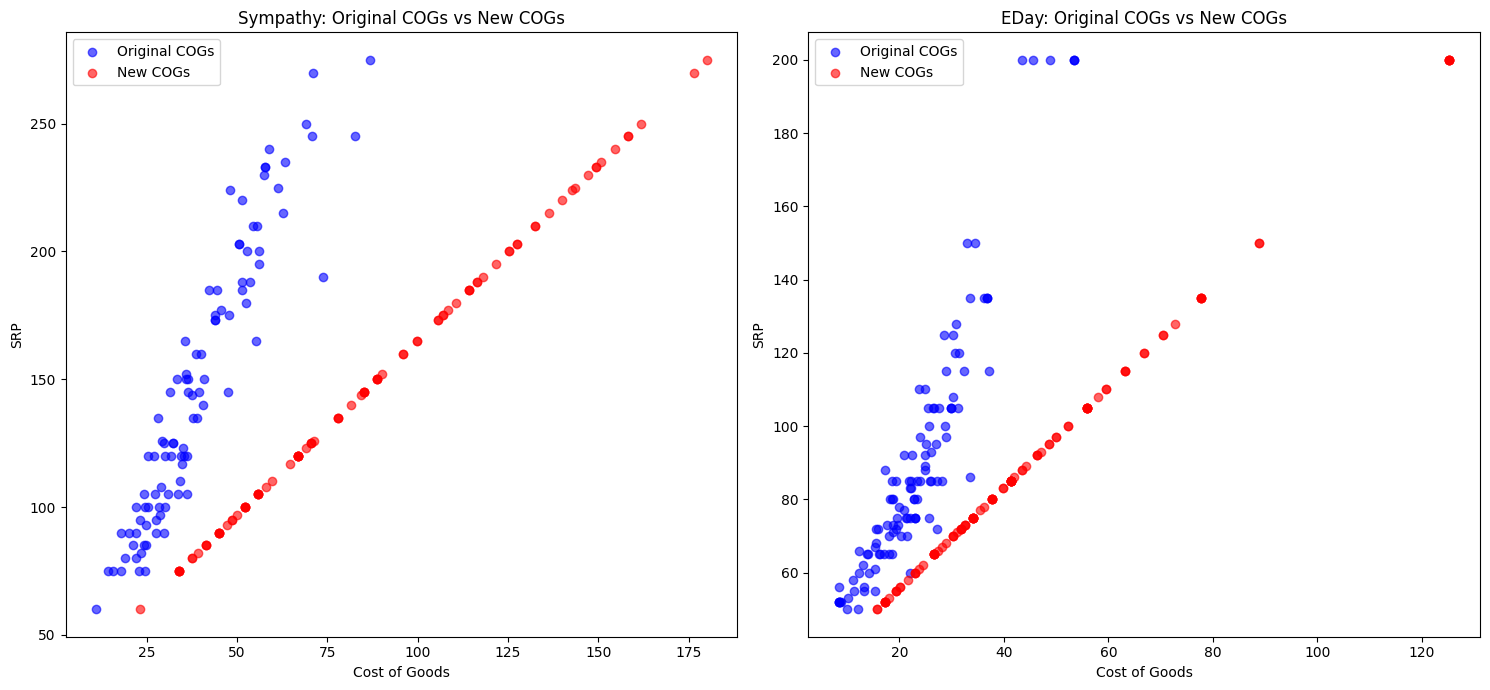

In [78]:
# Plotting the comparison between original and new COGs
plt.figure(figsize=(15, 7))

# Sympathy
plt.subplot(1, 2, 1)
plt.scatter(sympathy['Total Cost of Goods'], sympathy['SRP'], color='blue', label='Original COGs', alpha=0.6)
plt.scatter(sympathy['Derived COGs'], sympathy['SRP'], color='red', label='New COGs', alpha=0.6)
plt.title('Sympathy: Original COGs vs New COGs')
plt.xlabel('Cost of Goods')
plt.ylabel('SRP')
plt.legend()

# EDay
plt.subplot(1, 2, 2)
plt.scatter(eday['Total Cost of Goods'], eday['SRP'], color='blue', label='Original COGs', alpha=0.6)
plt.scatter(eday['Derived COGs'], eday['SRP'], color='red', label='New COGs', alpha=0.6)
plt.title('EDay: Original COGs vs New COGs')
plt.xlabel('Cost of Goods')
plt.ylabel('SRP')
plt.legend()

plt.tight_layout()
plt.show()
